# CCOB NB Run6 full analysis of circles

## TODO
- Hough transform

J. Bregeon (bregeon@in2p3.fr) - September 2023

### Setup Rubin LSST software stack

In [2]:
! eups list -s lsst_distrib

   gdf42428520+d521942ec3 	current w_2023_21 setup


## Import necesary libraries

In [3]:
%matplotlib inline
import numpy as np
import pylab as plt
import lsst.afw.display as afwDisplay
from lsst.afw.fits import Fits
from lsst.afw.image import Image
from astropy.io import fits


In [4]:
def displayImage(image,title=None):
    afwDisplay.setDefaultBackend('matplotlib') 
    fig = plt.figure(figsize=(10,10))
    afw_display = afwDisplay.Display(1)
    #afw_display.scale('asinh', 'zscale')
    afw_display.scale('linear', min=-5, max=50000)
    afw_display.setImageColormap(cmap='plasma')
    afw_display.mtv(image)
    plt.title(title)
    return afw_display


### Read the processed focal plane image

In [5]:
image_file="../data/MC_C_20230622_000357_full.fits"
# read file
print(f'opening {image_file}')
fits_file = Fits(image_file, 'r')
# check meta data
print(list(fits_file.readMetadata().items()))
# make image from array
img = Image(fits_file.readImageI(), dtype=np.int32)

opening ../data/MC_C_20230622_000357_full.fits
[('SIMPLE', True), ('BITPIX', -32), ('NAXIS', 2), ('NAXIS1', 7939), ('NAXIS2', 7927), ('EXTEND', True), ('COMMENT', "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H"), ('CTYPE1A', 'LINEAR'), ('CTYPE2A', 'LINEAR'), ('CRPIX1A', 1.0), ('CRPIX2A', 1.0), ('CRVAL1A', 0.0), ('CRVAL2A', 0.0), ('CUNIT1A', 'PIXEL'), ('CUNIT2A', 'PIXEL'), ('BZERO', 0.0), ('BSCALE', 1.0)]


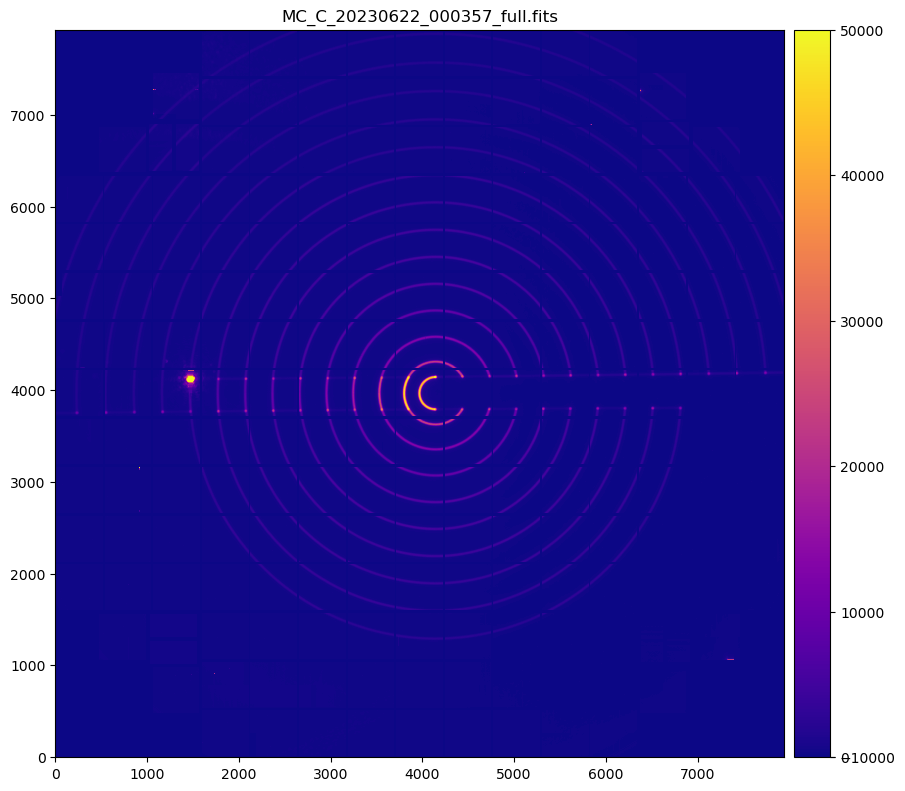

In [6]:
adisp = displayImage(img, title='MC_C_20230622_000357_full.fits')

In [7]:
from skimage import color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import line as draw_line
from matplotlib import cm
from skimage.draw import circle_perimeter

In [ ]:
# Line finding using the Probabilistic Hough Transform
image = img.getArray()
edges = canny(image, sigma=3, low_threshold=50, high_threshold=1000)


In [9]:
# Detect two radii
hough_radii = np.arange(0, 1000, 10)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=3)



In [10]:
cx, cy, radii

(array([4147, 4142, 4143]), array([3961, 3958, 3965]), array([190, 160, 160]))

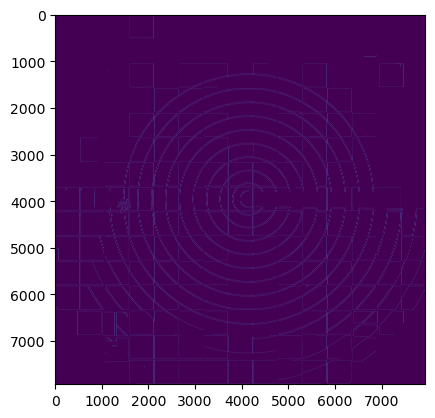

In [12]:
plt.imshow(edges)

In [1]:
# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()

NameError: name 'plt' is not defined